In [6]:
import math
#Параметры волокна
w = 3.25e-6 #Радиус поля моды
b = 2e-6#HРадиус сердцевины
NA = 0.2#Числовая апертура
Ner = 1.9e25
sigma12S = 3.198e-25
sigma12P = 2.245e-25
#Параметры для сигнала
Gs = 1 - math.exp(-(2 * b**2) / (w**2))
#Параметры для накачки
Vp = math.pi * 2 * b * NA / (980e-9)
wp = b * (0.65 + 1.65/((Vp)**1.5) + 2.879/((Vp)**6))
Gp = 1 - math.exp(-(2 * b**2) / (wp**2))
#print("",Vp)
print("Фактор перекрытия для сигнала:",Gs)
print("Фактор перекрытия для накачки:",Gp)

Фактор перекрытия для сигнала: 0.5311143935168284
Фактор перекрытия для накачки: 0.8302974312387831


L=10м;R1=0.9;R2=0.1
N21, Pp1, Ps1 = propa(40e-3, 0.0005501959133882549)
N22, Pp2, Ps2 = propa(60e-3, 0.0019495037471765877)
N23, Pp3, Ps3 = propa(80e-3, 0.0033478185636742785)
N24, Pp4, Ps4 = propa(100e-3, 0.00474595155707254)
N25, Pp5, Ps5 = propa(120e-3, 0.006144016435253161)
N26, Pp6, Ps6 = propa(20e-3, 4.178907528882929e-17)
N27, Pp7, Ps7 = propa(140e-3, 0.007542048727436434)
N28, Pp8, Ps8 = propa(160e-3, 0.008940063369018824)
L=3м;R1=0.9;R2=0.1
N21, Pp1, Ps1 = propa(40e-3, 0.002247964941077592)
N22, Pp2, Ps2 = propa(60e-3, 0.0036374311671429765)
N23, Pp3, Ps3 = propa(80e-3, 0.0050268974381731165)
N24, Pp4, Ps4 = propa(100e-3, 0.006416366199462061)
N25, Pp5, Ps5 = propa(120e-3, 0.007805831908027835)
N26, Pp6, Ps6 = propa(20e-3, 0.0008585061576054216)
N27, Pp7, Ps7 = propa(140e-3, 0.009195299152758457)
N28, Pp8, Ps8 = propa(160e-3, 0.01058476824010326)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import root_scalar

# Константы
t21 = 10e-3
h = 6.6e-34
Aeff = 3.14 * (2e-6)**2
Gp = 0.83
Gs = 0.5311143935168284
C = 3e8
hs = 1550e-9
hp = 980e-9
Ner = 1.9e25
alphap = 0.006
alphas = 0.0
l = 3
dhs = 0.16e-9
sigma12S = 3.198e-25
sigma21S = 4.4e-25
sigma12P = 2.245e-25
sigma21P = 0.0
z0 = 0
Z = 100
H = l / Z
zzz = np.linspace(z0, l, Z)
#R1 = 0.9
R2 = 0.9 # Выход
epsilon = 1e-6  # Точность для вычислений
#Pp = float(input("Введите начальную мощность накачки Pp0: "))
# Функции для расчета изменений концентраций и мощностей
def dN2(z, N2, N1, Pp, Ps):
    return Gp * hp / (h * C * Aeff ) * (sigma12P * N1 - sigma21P * N2) * Pp + Gs * hs / (h * C * Aeff) * \
           (sigma12S * N1 - sigma21S * N2) * Ps - N2 / t21
def dN1(z, N2, N1, Pp, Ps):
    return -(Gp * hp / (h * C * Aeff ) * (sigma12P * N1 - sigma21P * N2) * Pp + Gs * hs / (h * C * Aeff) * \
            (sigma12S * N1 - sigma21S * N2) * Ps - N2 / t21)
def dPp(z, N2, N1, Pp):
    return Gp * (sigma21P * N2 - sigma12P * N1) * Pp - alphap * Pp
def dPs(z, N2, N1, Ps):
    return Gs * (sigma21S * N2 - sigma12S * N1) * Ps - alphas * Ps + 2 * sigma21S * N2 * h * C**2 * dhs / (hs**3)
# Объединяем функции в одну для использования в solve_ivp
def system(z, y):
    N2, N1, Pp, Ps = y
    return np.array([dN2(z, N2, N1, Pp, Ps), dN1(z, N2, N1, Pp, Ps), dPp(z, N2, N1, Pp), dPs(z, N2, N1, Ps)])
# Функция для вычисления ошибки
def objective(x, Pp = 20e-3):
    sol = solve_ivp(system, [0, l], [0.0, Ner, Pp, x], method='RK45', max_step=H)
    Psl = sol.y[3, -1]  # Signal power at z = L
    return Psl * R2 - x  # Условие для метода секущих
# Используем встроенную функцию root_scalar
result = root_scalar(objective, method='secant', x0=0.001, x1=0.01, xtol=epsilon)
if result.converged:
    print(f"Решение найдено: x = {result.root}")
else:
    print("Метод секущих не сошелся")
def objective(x, Pp = 40e-3):
    sol = solve_ivp(system, [0, l], [0.0, Ner, Pp, x])
    Psl = sol.y[3, -1]  # Signal power at z = L
    return Psl * R2 - x  # Условие для метода секущих
# Используем встроенную функцию root_scalar
result = root_scalar(objective, method='secant', x0=0.001, x1=0.01, xtol=epsilon)
if result.converged:
    print(f"Решение найдено: x = {result.root}")
else:
    print("Метод секущих не сошелся")
def objective(x, Pp = 60e-3):
    sol = solve_ivp(system, [0, l], [0.0, Ner, Pp, x])
    Psl = sol.y[3, -1]  # Signal power at z = L
    return Psl * R2 - x  # Условие для метода секущих
# Используем встроенную функцию root_scalar
result = root_scalar(objective, method='secant', x0=0.001, x1=0.01, xtol=epsilon)
if result.converged:
    print(f"Решение найдено: x = {result.root}")
else:
    print("Метод секущих не сошелся")
def objective(x, Pp = 80e-3):
    sol = solve_ivp(system, [0, l], [0.0, Ner, Pp, x])
    Psl = sol.y[3, -1]  # Signal power at z = L
    return Psl * R2 - x  # Условие для метода секущих
# Используем встроенную функцию root_scalar
result = root_scalar(objective, method='secant', x0=0.001, x1=0.01, xtol=epsilon)
if result.converged:
    print(f"Решение найдено: x = {result.root}")
else:
    print("Метод секущих не сошелся")
def objective(x, Pp = 100e-3):
    sol = solve_ivp(system, [0, l], [0.0, Ner, Pp, x])
    Psl = sol.y[3, -1]  # Signal power at z = L
    return Psl * R2 - x  # Условие для метода секущих
# Используем встроенную функцию root_scalar
result = root_scalar(objective, method='secant', x0=0.001, x1=0.01, xtol=epsilon)
if result.converged:
    print(f"Решение найдено: x = {result.root}")
else:
    print("Метод секущих не сошелся")
def objective(x, Pp = 120e-3):
    sol = solve_ivp(system, [0, l], [0.0, Ner, Pp, x])
    Psl = sol.y[3, -1]  # Signal power at z = L
    return Psl * R2 - x  # Условие для метода секущих
# Используем встроенную функцию root_scalar
result = root_scalar(objective, method='secant', x0=0.001, x1=0.01, xtol=epsilon)
# Получаем решение
if result.converged:
    print(f"Решение найдено: x = {result.root}")
else:
    print("Метод секущих не сошелся")
def objective(x, Pp = 140e-3):
    sol = solve_ivp(system, [0, l], [0.0, Ner, Pp, x])
    Psl = sol.y[3, -1]  # Signal power at z = L
    return Psl * R2 - x  # Условие для метода секущих
# Используем встроенную функцию root_scalar
result = root_scalar(objective, method='secant', x0=0.001, x1=0.01, xtol=epsilon)
# Получаем решение
if result.converged:
    print(f"Решение найдено: x = {result.root}")
else:
    print("Метод секущих не сошелся")
def objective(x, Pp = 160e-3):
    sol = solve_ivp(system, [0, l], [0.0, Ner, Pp, x])
    Psl = sol.y[3, -1]  # Signal power at z = L
    return Psl * R2 - x  # Условие для метода секущих
# Используем встроенную функцию root_scalar
result = root_scalar(objective, method='secant', x0=0.001, x1=0.01, xtol=epsilon)
# Получаем решение
if result.converged:
    print(f"Решение найдено: x = {result.root}")
else:
    print("Метод секущих не сошелся")

Решение найдено: x = 0.07807953647478746
Решение найдено: x = 0.19129633245021796
Решение найдено: x = 0.30451305180014154
Решение найдено: x = 0.4177296998018167
Решение найдено: x = 0.5309464521970559
Решение найдено: x = 0.6441630618352547
Решение найдено: x = 0.7573796997804331
Решение найдено: x = 0.8705963907302681


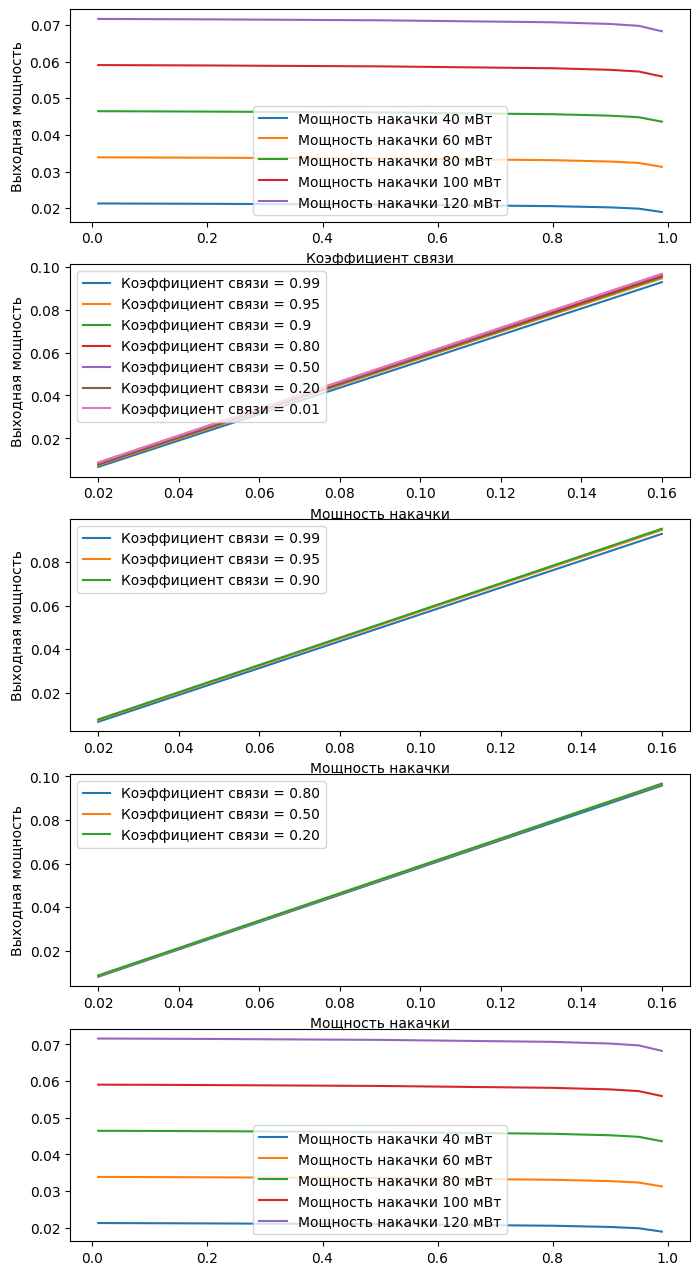

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
# Константы
t21 = 10e-3
h = 6.6e-34
Aeff = 3.14 * (2e-6)**2
Gp = 0.83
Gs = 0.5311143935168284
C = 3e8
hs = 1550e-9
hp = 980e-9
Ner = 1.9e25
alphap = 0.006
alphas = 0.0
l = 3
dhs = 0.16e-9
sigma12S = 3.198e-25
sigma21S = 4.4e-25
sigma12P = 2.245e-25
sigma21P = 0.0
z0 = 0
Z = 100
H = l / Z
z = np.linspace(z0, l, Z)
# Функции для расчета изменений концентраций и мощностей
def dN2(z, N2, Pp, Ps):
    return Gp * hp / (h * C * Aeff ) * (sigma12P * (Ner - N2) - sigma21P * N2) * Pp + Gs * hs / (h * C * Aeff) * \
           (sigma12S * (Ner  - N2) - sigma21S * N2) * Ps - N2 / t21
def dPp(z, N2, Pp):
    return Gp * (sigma21P * N2 - sigma12P * (Ner - N2)) * Pp - alphap * Pp
def dPs(z, N2, Ps):
    return Gs * (sigma21S * N2 - sigma12S * (Ner  - N2)) * Ps - alphas * Ps + 2 * sigma21S * N2 * h * C**2 * dhs / (hs**3)
# Объединяем функции в одну для использования в solve_ivp
def system(t, y):
    N2, Pp, Ps = y
    return [dN2(t, N2, Pp, Ps), dPp(t, N2, Pp), dPs(t, N2, Ps)]
# Функция для численного решения системы ОДУ методом Рунге-Кутты 4-го порядка
def propa(Pp0, Ps0):
    # Начальные условия
    N20 = 0.0
    # Решение системы дифференциальных уравнений методом Рунге-Кутта четвертого порядка
    sol = solve_ivp(system, [z0, l], [N20, Pp0, Ps0], method='RK45', max_step=H)
    # Получение решений
    N2 = sol.y[0]
    Pp = sol.y[1]
    Ps = sol.y[2]
    # Интерполяция решений на сетку z
    N2_interp = np.interp(z, sol.t, N2)
    Pp_interp = np.interp(z, sol.t, Pp)
    Ps_interp = np.interp(z, sol.t, Ps) 
    return N2_interp, Pp_interp, Ps_interp
# Вызов функции и получение результатов для 90% - выхода +
N21, Pp1, Ps1 = propa(40e-3, 0.002247964941077592)
N22, Pp2, Ps2 = propa(60e-3, 0.0036374311671429765)
N23, Pp3, Ps3 = propa(80e-3, 0.0050268974381731165)
N24, Pp4, Ps4 = propa(100e-3, 0.006416366199462061)
N25, Pp5, Ps5 = propa(120e-3, 0.007805831908027835)
N26, Pp6, Ps6 = propa(20e-3, 0.0008585061576054216)
N27, Pp7, Ps7 = propa(140e-3, 0.009195299152758457)
N28, Pp8, Ps8 = propa(160e-3, 0.01058476824010326)
#Для 99% выхода + 
N21_99, Pp1_99, Ps1_99 = propa(40e-3, 0.00019151702988250935)
N22_99, Pp2_99, Ps2_99 = propa(60e-3, 0.0003160058600437555)
N23_99, Pp3_99, Ps3_99 = propa(80e-3, 0.00044049551414909787)
N24_99, Pp4_99, Ps4_99 = propa(100e-3,  0.0005649853391193708)
N25_99, Pp5_99, Ps5_99 = propa(120e-3, 0.0006894754392289913)
N26_99, Pp6_99, Ps6_99 = propa(20e-3, 6.703544246963447e-05)
N27_99, Pp7_99, Ps7_99 = propa(140e-3,  0.0008139653600445639)
N28_99, Pp8_99, Ps8_99 = propa(160e-3,  0.0009384633367504937)
#Для 95% выхода +
N21_95, Pp1_95, Ps1_95 = propa(40e-3, 0.0010462485408549785)
N22_95, Pp2_95, Ps2_95 = propa(60e-3, 0.0017023800505818036)
N23_95, Pp3_95, Ps3_95 = propa(80e-3, 0.00235849620823549)
N24_95, Pp4_95, Ps4_95 = propa(100e-3,0.003014611512156072)
N25_95, Pp5_95, Ps5_95 = propa(120e-3, 0.0036707275982763347)
N26_95, Pp6_95, Ps6_95 = propa(20e-3, 0.0003901590029549401)
N27_95, Pp7_95, Ps7_95 = propa(140e-3, 0.0043268437209447235)
N28_95, Pp8_95, Ps8_95 = propa(160e-3, 0.004982960212338263)
#Для 80% выхода +
N21_80, Pp1_80, Ps1_80 = propa(40e-3, 0.005141874306485649)
N22_80, Pp2_80, Ps2_80 = propa(60e-3, 0.008275743598271532)
N23_80, Pp3_80, Ps3_80 = propa(80e-3, 0.01140961166614667)
N24_80, Pp4_80, Ps4_80 = propa(100e-3,  0.014543481208180935)
N25_80, Pp5_80, Ps5_80 = propa(120e-3, 0.017677352205180186)
N26_80, Pp6_80, Ps6_80 = propa(20e-3, 0.00200800555660353)
N27_80, Pp7_80, Ps7_80 = propa(140e-3,  0.020811220655283767)
N28_80, Pp8_80, Ps8_80 = propa(160e-3,   0.023945090031915927)
#Для 50% выход + 
N21_50, Pp1_50, Ps1_50 = propa(40e-3,  0.020991958056930757)
N22_50, Pp2_50, Ps2_50 = propa(60e-3, 0.03355727482122567)
N23_50, Pp3_50, Ps3_50 = propa(80e-3, 0.04612258866070121)
N24_50, Pp4_50, Ps4_50 = propa(100e-3, 0.058687898974782986)
N25_50, Pp5_50, Ps5_50 = propa(120e-3, 0.07125320666197733)
N26_50, Pp6_50, Ps6_50 = propa(20e-3, 0.008426619903123678)
N27_50, Pp7_50, Ps7_50 = propa(140e-3, 0.084335207180921994)
N28_50, Pp8_50, Ps8_50 = propa(160e-3, 0.0963838207017215)
#Для 20% выхода +
N21_20, Pp1_20, Ps1_20 = propa(40e-3, 0.08481159330520721)
N22_20, Pp2_20, Ps2_20 = propa(60e-3, 0.13511970560306774)
N23_20, Pp3_20, Ps3_20 = propa(80e-3, 0.18542779044026883)
N24_20, Pp4_20, Ps4_20 = propa(100e-3,  0.2357358709825198)
N25_20, Pp5_20, Ps5_20 = propa(120e-3, 0.28604396364846246)
N26_20, Pp6_20, Ps6_20 = propa(20e-3, 0.03450343607359794)
N27_20, Pp7_20, Ps7_20 = propa(140e-3,  0.33635207180921994)
N28_20, Pp8_20, Ps8_20 = propa(160e-3,  0.38666012485859436)
#Для 10% выхода +
N21_10, Pp1_10, Ps1_10 = propa(40e-3, 0.1912963324501913)
N22_10, Pp2_10, Ps2_10 = propa(60e-3, 0.30451305180016086)
N23_10, Pp3_10, Ps3_10 = propa(80e-3, 0.41772969980178976)
N24_10, Pp4_10, Ps4_10 = propa(100e-3, 0.5309464521971589)
N25_10, Pp5_10, Ps5_10 = propa(120e-3, 0.6441630618351992)
N26_10, Pp6_10, Ps6_10 = propa(20e-3, 0.07807953647479024)
N27_10, Pp7_10, Ps7_10 = propa(140e-3,  0.7573796997803831)
N28_10, Pp8_10, Ps8_10 = propa(160e-3,  0.87059639073044)
#Для 1% выхода +
N21_1, Pp1_1, Ps1_1 = propa(40e-3, 2.108428640198686)
N22_1, Pp2_1, Ps2_1 = propa(60e-3, 3.3540120236779125)
N23_1, Pp3_1, Ps3_1 = propa(80e-3, 4.599596285864246)
N24_1, Pp4_1, Ps4_1 = propa(100e-3,  5.845179211165245)
N25_1, Pp5_1, Ps5_1 = propa(120e-3, 7.090762837109806)
N26_1, Pp6_1, Ps6_1 = propa(20e-3, 0.8628446206566399)
N27_1, Pp7_1, Ps7_1 = propa(140e-3,  8.336347516393648)
N28_1, Pp8_1, Ps8_1 = propa(160e-3,  9.581930740849693)
# Вывод графика зависимости мощности сигнала накачки от координаты z
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(8, 16))
'''axs[0].plot(z, Pp1, label ='Накачка 40 мВт')
axs[0].plot(z, Pp2, label ='Накачка 60 мВт')
axs[0].plot(z, Pp3, label ='Накачка 80 мВт')
axs[0].plot(z, Pp4, label ='Накачка 100 мВт')
axs[0].plot(z, Pp5, label ='Накачка 120 мВт')
axs[0].axhline(y=0, color='k', linestyle='-')
axs[0].axvline(x=0, color='k', linestyle='-')
axs[0].set_title("Зависимость мощности накачки от длины легированного волокна L")
axs[0].set_xlabel("L")
axs[0].set_ylabel("Pp")
#axs[1].set_xlim([z0,20])
axs[1].plot(z, Ps1, label ='Накачка 40 мВт')
axs[1].plot(z, Ps2, label ='Накачка 60 мВт')
axs[1].plot(z, Ps3, label ='Накачка 80 мВт')
axs[1].plot(z, Ps4, label ='Накачка 100 мВт')
axs[1].plot(z, Ps5, label ='Накачка 120 мВт')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].axvline(x=0, color='k', linestyle='-')
#axs[1].axvline(x=15, color='k', linestyle='-')
axs[1].set_title("Зависимость мощности генерации внутри резонатора от длины легированного волокна L")
axs[1].set_xlabel("L")
axs[1].set_ylabel("Ps")
axs[2].plot(z, Pp4, label ='Pump power')
axs[2].plot(z, Ps4, label ='Output Power')
axs[2].set_xlabel("L")
axs[2].set_ylabel("Powers")
axs[2].axhline(y=0, color='k', linestyle='-')
axs[2].axvline(x=0, color='k', linestyle='-')
axs[2].set_title("Зависимость мощности накачки и мощности лазера внутри резонатора от длины легированного волокна L")'''

PP = np.array([Pp6[0], Pp1[0], Pp2[0], Pp3[0], Pp4[0], Pp5[0], Pp7[0], Pp8[0]])
PS = 0.9 * np.array([Ps6[-1],Ps1[-1], Ps2[-1], Ps3[-1], Ps4[-1], Ps5[-1], Ps7[-1], Ps8[-1]])
#axs[3].plot(PP, PS, label ='EDF L=6m, Coupling ratio=0.9')
PP_99 = np.array([Pp6_99[0], Pp1_99[0], Pp2_99[0], Pp3_99[0], Pp4_99[0], Pp5_99[0], Pp7_99[0], Pp8_99[0]])
PS_99 = 0.99 * np.array([Ps6_99[-1], Ps1_99[-1], Ps2_99[-1], Ps3_99[-1], Ps4_99[-1], Ps5_99[-1], Ps7_99[-1], Ps8_99[-1]])
PP_95 = np.array([Pp6_95[0], Pp1_95[0], Pp2_95[0], Pp3_95[0], Pp4_95[0], Pp5_95[0], Pp7_95[0], Pp8_95[0]])
PS_95 = 0.95 * np.array([Ps6_95[-1], Ps1_95[-1], Ps2_95[-1], Ps3_95[-1], Ps4_95[-1], Ps5_95[-1], Ps7_95[-1], Ps8_95[-1]])
PP_80 = np.array([Pp6_80[0], Pp1_80[0], Pp2_80[0], Pp3_80[0], Pp4_80[0], Pp5_80[0], Pp7_80[0], Pp8_80[0]])
PS_80 = 0.8 * np.array([Ps6_80[-1], Ps1_80[-1], Ps2_80[-1], Ps3_80[-1], Ps4_80[-1], Ps5_80[-1], Ps7_80[-1], Ps8_80[-1]])
PP_50 = np.array([Pp6_50[0], Pp1_50[0], Pp2_50[0], Pp3_50[0], Pp4_50[0], Pp5_50[0], Pp7_50[0], Pp8_50[0]])
PS_50 = 0.5 * np.array([Ps6_50[-1], Ps1_50[-1], Ps2_50[-1], Ps3_50[-1], Ps4_50[-1], Ps5_50[-1], Ps7_50[-1], Ps8_50[-1]])
PP_20 = np.array([Pp6_20[0], Pp1_20[0], Pp2_20[0], Pp3_20[0], Pp4_20[0], Pp5_20[0], Pp7_20[0], Pp8_20[0]])
PS_20 = 0.2 * np.array([Ps6_20[-1], Ps1_20[-1], Ps2_20[-1], Ps3_20[-1], Ps4_20[-1], Ps5_20[-1], Ps7_20[-1], Ps8_20[-1]])
PP_10 = np.array([Pp6_10[0], Pp1_10[0], Pp2_10[0], Pp3_10[0], Pp4_10[0], Pp5_10[0], Pp7_10[0], Pp8_10[0]])
PS_10 = 0.1 * np.array([Ps6_10[-1], Ps1_10[-1], Ps2_10[-1], Ps3_10[-1], Ps4_10[-1], Ps5_10[-1], Ps7_10[-1], Ps8_10[-1]])
PP_1 = np.array([Pp6_1[0], Pp1_1[0], Pp2_1[0], Pp3_1[0], Pp4_1[0], Pp5_1[0], Pp7_1[0], Pp8_1[0]])
PS_1 = 0.01 * np.array([Ps6_1[-1], Ps1_1[-1], Ps2_1[-1], Ps3_1[-1], Ps4_1[-1], Ps5_1[-1], Ps7_1[-1], Ps8_1[-1]])

CoupRat = np.array([0.01 ,0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 0.99])

Ps_40mW = np.array([0.01 * Ps1_1[-1], 0.1 * Ps1_10[-1], 0.2 * Ps1_20[-1], 0.5 * Ps1_50[-1], 0.8 * Ps1_80[-1], 0.9 * Ps1[-1], 0.95 * Ps1_95[-1], 0.99 * Ps1_99[-1]])
Ps_60mW = np.array([0.01 * Ps2_1[-1], 0.1 * Ps2_10[-1], 0.2 * Ps2_20[-1], 0.5 * Ps2_50[-1], 0.8 * Ps2_80[-1], 0.9 * Ps2[-1], 0.95 * Ps2_95[-1], 0.99 * Ps2_99[-1]])
Ps_80mW = np.array([0.01 * Ps3_1[-1], 0.1 * Ps3_10[-1], 0.2 * Ps3_20[-1], 0.5 * Ps3_50[-1], 0.8 * Ps3_80[-1], 0.9 * Ps3[-1], 0.95 * Ps3_95[-1], 0.99 * Ps3_99[-1]])
Ps_100mW = np.array([0.01 * Ps4_1[-1], 0.1 * Ps4_10[-1], 0.2 * Ps4_20[-1], 0.5 * Ps4_50[-1], 0.8 * Ps4_80[-1], 0.9 * Ps4[-1], 0.95 * Ps4_95[-1], 0.99 * Ps4_99[-1]])
Ps_120mW = np.array([0.01 * Ps5_1[-1], 0.1 * Ps5_10[-1], 0.2 * Ps5_20[-1], 0.5 * Ps5_50[-1], 0.8 * Ps5_80[-1], 0.9 * Ps5[-1], 0.95 * Ps5_95[-1], 0.99 * Ps5_99[-1]])

axs[0].plot(CoupRat, Ps_40mW, label = 'Мощность накачки 40 мВт')
axs[0].plot(CoupRat, Ps_60mW, label = 'Мощность накачки 60 мВт')
axs[0].plot(CoupRat, Ps_80mW, label = 'Мощность накачки 80 мВт')
axs[0].plot(CoupRat, Ps_100mW, label = 'Мощность накачки 100 мВт')
axs[0].plot(CoupRat, Ps_120mW, label = 'Мощность накачки 120 мВт')
axs[0].set_xlabel("Коэффициент связи")
axs[0].set_ylabel("Выходная мощность")

axs[1].plot(PP_99, PS_99, label = 'Коэффициент связи = 0.99')
axs[1].plot(PP_95, PS_95, label = 'Коэффициент связи = 0.95')
axs[1].plot(PP, PS, label = 'Коэффициент связи = 0.9')
axs[1].plot(PP_80, PS_80, label = 'Коэффициент связи = 0.80')
axs[1].plot(PP_50, PS_50, label = 'Коэффициент связи = 0.50')
axs[1].plot(PP_20, PS_20, label = 'Коэффициент связи = 0.20')
#axs[1].plot(PP_10, PS_10, label = 'Коэффициент связи = 0.10')
axs[1].plot(PP_1, PS_1, label = 'Коэффициент связи = 0.01')
axs[1].set_xlabel("Мощность накачки")
axs[1].set_ylabel("Выходная мощность")

axs[2].plot(PP_99, PS_99, label = 'Коэффициент связи = 0.99')
axs[2].plot(PP_95, PS_95, label = 'Коэффициент связи = 0.95')
#axs[2].plot(PP, PS, label = 'Коэффициент связи = 0.9')
#axs[2].plot(PP_80, PS_80, label = 'Коэффициент связи = 0.80')
#axs[2].plot(PP_50, PS_50, label = 'Коэффициент связи = 0.50')
#axs[2].plot(PP_20, PS_20, label = 'Коэффициент связи = 0.20')
#axs[2].plot(PP_10, PS_10, label = 'Коэффициент связи = 0.10')
axs[2].plot(PP, PS, label = 'Коэффициент связи = 0.90')
axs[2].set_xlabel("Мощность накачки")
axs[2].set_ylabel("Выходная мощность")

#axs[3].plot(PP_99, PS_99, label = 'Коэффициент связи = 0.99')
#axs[3].plot(PP_95, PS_95, label = 'Коэффициент связи = 0.95')
#axs[3].plot(PP, PS, label = 'Коэффициент связи = 0.9')
axs[3].plot(PP_80, PS_80, label = 'Коэффициент связи = 0.80')
axs[3].plot(PP_50, PS_50, label = 'Коэффициент связи = 0.50')
axs[3].plot(PP_20, PS_20, label = 'Коэффициент связи = 0.20')
#axs[3].plot(PP_10, PS_10, label = 'Коэффициент связи = 0.10')
#axs[3].plot(PP_1, PS_1, label = 'Коэффициент связи = 0.01')
axs[3].set_xlabel("Мощность накачки")
axs[3].set_ylabel("Выходная мощность")

'''CoupRat1 = np.array([0.01, 0.05,0.1, 0.2, 0.8, 0.9, 0.95, 0.99])
Ps_40mW1= np.array([Ps1_99[-1], Ps1_95[-1], Ps1[-1], Ps1_80[-1], Ps1_80[-1], Ps1[-1], Ps1_95[-1], Ps1_99[-1]])
Ps_60mW1 = np.array([Ps2_99[-1], Ps2_95[-1], Ps2[-1] ,Ps2_80[-1] ,Ps2_80[-1], Ps2[-1], Ps2_95[-1], Ps2_99[-1]])
Ps_80mW1 = np.array([Ps3_99[-1], Ps3_95[-1], Ps3[-1] ,Ps3_80[-1],Ps3_80[-1], Ps3[-1], Ps3_95[-1], Ps3_99[-1]])
Ps_100mW1 = np.array([Ps4_99[-1], Ps4_95[-1], Ps4[-1] ,Ps4_80[-1],Ps4_80[-1], Ps4[-1], Ps4_95[-1], Ps4_99[-1]])
Ps_120mW1 = np.array([Ps5_99[-1], Ps5_95[-1], Ps5[-1], Ps5_80[-1], Ps5_80[-1], Ps5[-1], Ps5_95[-1], Ps5_99[-1]])'''

CoupRat1 = np.array([0.01, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 0.99])
Ps_40mW1= np.array([0.01 * Ps1_1[-1], 0.1 * Ps1_10[-1], 0.2 * Ps1_20[-1], 0.5 * Ps1_50[-1], 0.8 * Ps1_80[-1], 0.9 * Ps1[-1], 0.95 * Ps1_95[-1], 0.99 * Ps1_99[-1]])
Ps_60mW1 = np.array([0.01 * Ps2_1[-1], 0.1 * Ps2_10[-1], 0.2 * Ps2_20[-1], 0.5 * Ps2_50[-1], 0.8 * Ps2_80[-1], 0.9 * Ps2[-1], 0.95 * Ps2_95[-1], 0.99 * Ps2_99[-1]])
Ps_80mW1 = np.array([0.01 * Ps3_1[-1], 0.1 * Ps3_10[-1], 0.2 * Ps3_20[-1], 0.5 * Ps3_50[-1], 0.8 * Ps3_80[-1], 0.9 * Ps3[-1], 0.95 * Ps3_95[-1], 0.99 * Ps3_99[-1]])
Ps_100mW1 = np.array([0.01 * Ps4_1[-1], 0.1 * Ps4_10[-1], 0.2 * Ps4_20[-1], 0.5 * Ps4_50[-1], 0.8 * Ps4_80[-1], 0.9 * Ps4[-1], 0.95 * Ps4_95[-1], 0.99 * Ps4_99[-1]])
Ps_120mW1 = np.array([0.01 * Ps5_1[-1], 0.1 * Ps5_10[-1], 0.2 * Ps5_20[-1], 0.5 * Ps5_50[-1], 0.8 * Ps5_80[-1], 0.9 * Ps5[-1], 0.95 * Ps5_95[-1], 0.99 * Ps5_99[-1]])

axs[4].plot(CoupRat1, Ps_40mW1, label = 'Мощность накачки 40 мВт')
axs[4].plot(CoupRat1, Ps_60mW1, label = 'Мощность накачки 60 мВт')
axs[4].plot(CoupRat1, Ps_80mW1, label = 'Мощность накачки 80 мВт')
axs[4].plot(CoupRat1, Ps_100mW1, label = 'Мощность накачки 100 мВт')
axs[4].plot(CoupRat1, Ps_120mW1, label = 'Мощность накачки 120 мВт')
#axs[4].plot(PP_1, PS_1, label = 'Coupling ratio = 0.01')
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()
axs[4].legend()
plt.show()

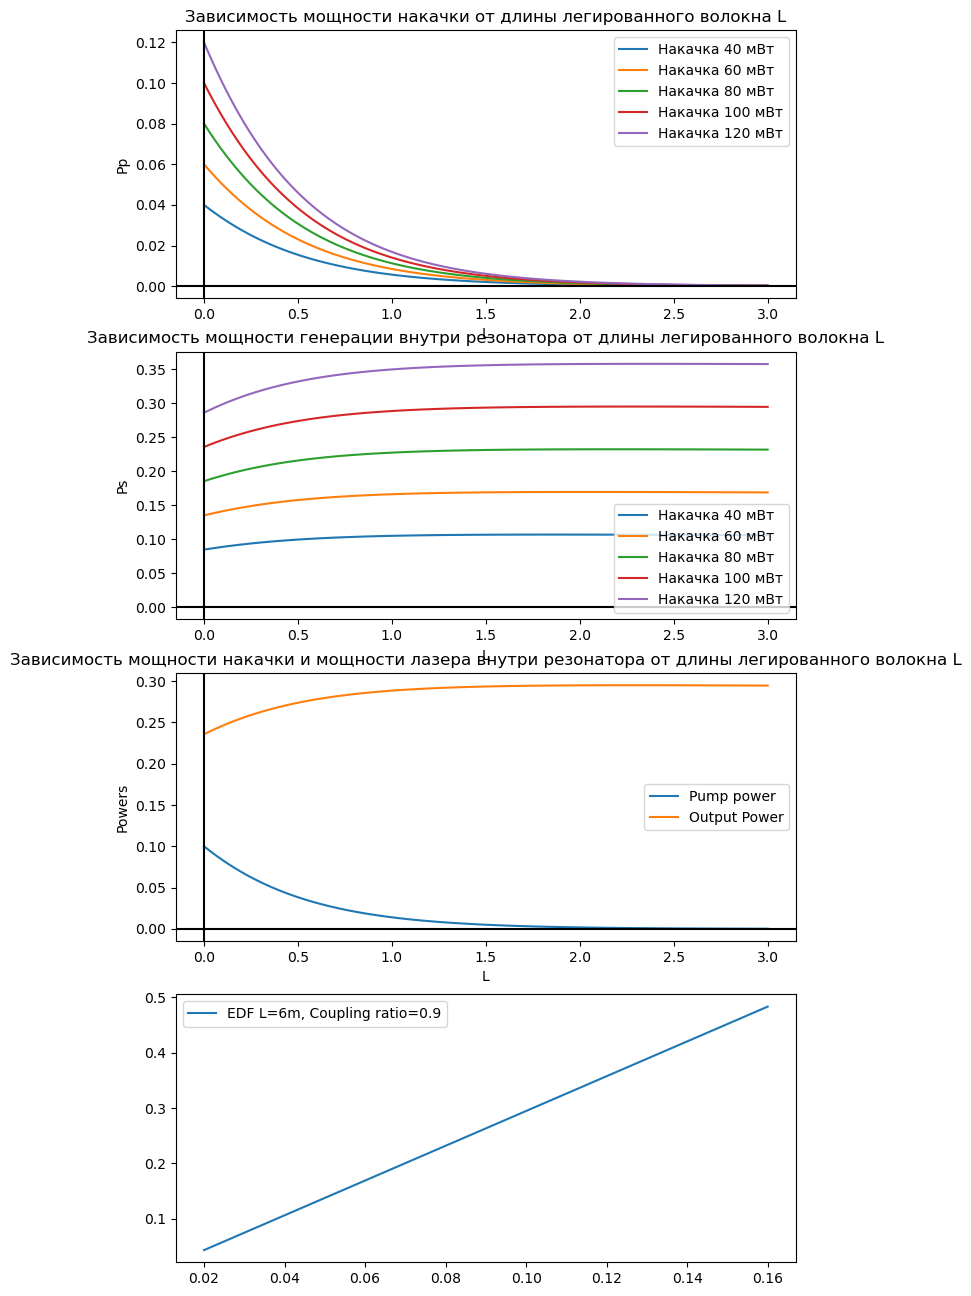

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
# Константы
t21 = 10e-3
h = 6.6e-34
Aeff = 3.14 * (2e-6)**2
Gp = 0.83
Gs = 0.5311143935168284
C = 3e8
hs = 1550e-9
hp = 980e-9
Ner = 1.9e25
alphap = 0.006
alphas = 0.0
l = 3
dhs = 0.16e-9
sigma12S = 3.198e-25
sigma21S = 4.4e-25
sigma12P = 2.245e-25
sigma21P = 0.0
z0 = 0
Z = 100
H = l / Z
z = np.linspace(z0, l, Z)
# Функции для расчета изменений концентраций и мощностей
def dN2(z, N2, Pp, Ps):
    return Gp * hp / (h * C * Aeff ) * (sigma12P * (Ner - N2) - sigma21P * N2) * Pp + Gs * hs / (h * C * Aeff) * \
           (sigma12S * (Ner  - N2) - sigma21S * N2) * Ps - N2 / t21
def dPp(z, N2, Pp):
    return Gp * (sigma21P * N2 - sigma12P * (Ner - N2)) * Pp - alphap * Pp
def dPs(z, N2, Ps):
    return Gs * (sigma21S * N2 - sigma12S * (Ner  - N2)) * Ps - alphas * Ps + 2 * sigma21S * N2 * h * C**2 * dhs / (hs**3)
# Объединяем функции в одну для использования в solve_ivp
def system(t, y):
    N2, Pp, Ps = y
    return [dN2(t, N2, Pp, Ps), dPp(t, N2, Pp), dPs(t, N2, Ps)]
# Функция для численного решения системы ОДУ методом Рунге-Кутты 4-го порядка
def propa(Pp0, Ps0):
    # Начальные условия
    N20 = 0.0
    # Решение системы дифференциальных уравнений методом Рунге-Кутта четвертого порядка
    sol = solve_ivp(system, [z0, l], [N20, Pp0, Ps0], method='RK45', max_step=H)
    # Получение решений
    N2 = sol.y[0]
    Pp = sol.y[1]
    Ps = sol.y[2]
    # Интерполяция решений на сетку z
    N2_interp = np.interp(z, sol.t, N2)
    Pp_interp = np.interp(z, sol.t, Pp)
    Ps_interp = np.interp(z, sol.t, Ps) 
    return N2_interp, Pp_interp, Ps_interp
# Вызов функции и получение результатов для вызодного коэффициента 
N21, Pp1, Ps1 = propa(40e-3, 0.08481159330520721)
N22, Pp2, Ps2 = propa(60e-3, 0.13511970560306774)
N23, Pp3, Ps3 = propa(80e-3, 0.18542779044026883)
N24, Pp4, Ps4 = propa(100e-3,  0.2357358709825198)
N25, Pp5, Ps5 = propa(120e-3, 0.28604396364846246)
N26, Pp6, Ps6 = propa(20e-3, 0.03450343607359794)
N27, Pp7, Ps7 = propa(140e-3,  0.33635207180921994)
N28, Pp8, Ps8 = propa(160e-3,  0.38666012485859436)
# Вывод графика зависимости мощности сигнала накачки от координаты z
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(8, 16))
axs[0].plot(z, Pp1, label ='Накачка 40 мВт')
axs[0].plot(z, Pp2, label ='Накачка 60 мВт')
axs[0].plot(z, Pp3, label ='Накачка 80 мВт')
axs[0].plot(z, Pp4, label ='Накачка 100 мВт')
axs[0].plot(z, Pp5, label ='Накачка 120 мВт')
axs[0].axhline(y=0, color='k', linestyle='-')
axs[0].axvline(x=0, color='k', linestyle='-')
axs[0].set_title("Зависимость мощности накачки от длины легированного волокна L")
axs[0].set_xlabel("L")
axs[0].set_ylabel("Pp")
#axs[1].set_xlim([z0,20])
axs[1].plot(z, Ps1, label ='Накачка 40 мВт')
axs[1].plot(z, Ps2, label ='Накачка 60 мВт')
axs[1].plot(z, Ps3, label ='Накачка 80 мВт')
axs[1].plot(z, Ps4, label ='Накачка 100 мВт')
axs[1].plot(z, Ps5, label ='Накачка 120 мВт')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].axvline(x=0, color='k', linestyle='-')
#axs[1].axvline(x=15, color='k', linestyle='-')
axs[1].set_title("Зависимость мощности генерации внутри резонатора от длины легированного волокна L")
axs[1].set_xlabel("L")
axs[1].set_ylabel("Ps")
axs[2].plot(z, Pp4, label ='Pump power')
axs[2].plot(z, Ps4, label ='Output Power')
axs[2].set_xlabel("L")
axs[2].set_ylabel("Powers")
axs[2].axhline(y=0, color='k', linestyle='-')
axs[2].axvline(x=0, color='k', linestyle='-')
axs[2].set_title("Зависимость мощности накачки и мощности лазера внутри резонатора от длины легированного волокна L")
PP = np.array([Pp6[0], Pp1[0], Pp2[0], Pp3[0], Pp4[0], Pp5[0], Pp7[0], Pp8[0]])
PS = np.array([Ps6[-1],Ps1[-1], Ps2[-1], Ps3[-1], Ps4[-1], Ps5[-1], Ps7[-1], Ps8[-1]])
axs[3].plot(PP, PS, label ='EDF L=6m, Coupling ratio=0.9')
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()
plt.show()